# Inaugural Project - Household model
---
**HouseholdSpecializationModel.py** is a code that defines a class called **HouseholdSpecializationModelClass** that represents an economic model of household specialization. The class is designed to estimate the parameters of the model and solve it for different wage levels. The model is based on utility maximization, subject to constraints on time allocation and production in the household.

**HouseholdSpecializationModelClass** is built up, with different functions each describing different parts of the economy:

**__init__**: Initializes the model parameters and creates namespaces for model parameters (par) and model solutions (sol).

**calc_utility**: Calculates the utility based on consumption of market goods, home production, and disutility of work.

**solve_discrete**: Solves the model discretely by considering all possible combinations of time allocations for work and home production.

**solve_continuous**: Solves the model continuously by optimizing the utility function using the Nelder-Mead method, given initial guesses for time allocations.

**solve_wF_vec**: Solves the model for a vector of female wages, using either the discrete or continuous solution method.

**run_regression**: Runs a regression of the log ratio of female to male home production hours on the log of the female wage rate, estimating intercept and slope coefficients (beta0 and beta1).

**estimate**: Estimates the parameters alpha and sigma by minimizing the sum of squared differences between the model's predicted $\beta_0$ and $\beta_1$ and their target values.

# Necessities
The following are all the necessary libraries and imports needed for calculations and data visualization.

In [1]:
# Importing relevant libraries for mathematical calculations and data visulization
import numpy as np
from matplotlib import pyplot as plt

# Importing ipywidgets for creating an interactive model
from ipywidgets import interact, fixed

# Importing code for economic model
import HouseholdSpecializationModel as model

# Defining model as 'HouseholdSpecializationModelClass'
model = model.HouseholdSpecializationModelClass()

# Question 1

1. Define a list of possible $\alpha$ and $\sigma$ values
2. Create empty lists to store the calculated $H_F$ values, $H_M$ values, and the $\frac{H_F}{H_M}$ ratio.
3. Iterate over each combination of $\alpha$ and $\sigma$ values:
    - Assign the current $\alpha$ and $\sigma$ values to the model.
    - Solve the model using the solve_discrete method.
    - Append the resulting $H_F$ and $H_M$ values to their respective lists, and calculate and append the $\frac{H_F}{H_M}$ ratio to its list.
4. Reshape the list of $\frac{H_F}{H_M}$ ratios into a matrix with rows corresponding to different $\alpha$ values and columns to different $\sigma$ values.
5. Create a table showing the $\frac{H_F}{H_M}$ ratios for each combination of $\alpha$ and $\sigma$.
6. Create a line plot of the $\frac{H_F}{H_M}$ ratio for each value of $\alpha$ as a function of $\sigma$. Make this interactive

In [8]:
# Defining values for alpha and sigma
alpha_values = [0.25, 0.50, 0.75]
sigma_values = [0.50, 1.00, 1.50]

# Creating empty lists for HF/HM ratio
HF_HM_ratio = []

# Creating a table
print('Table 1: Relative labor in home production, HF/HM')
print('---------------------------------------------------')  # line separator

# Print header
print('| Alpha | Sigma = 0.5 | Sigma = 1.0 | Sigma = 1.5 |')
print('|-------|-------------|-------------|-------------|')

for alpha in alpha_values:
    row = f'| {alpha:.2f}  |'

    for sigma in sigma_values:
        model.par.alpha = alpha
        model.par.sigma = sigma

        # Solving the model
        result = model.solve_discrete()

        # Appending HF/HM ratio to the list
        HF_HM_ratio.append(result.HF/result.HM)

        # Add output to string
        row += f' {result.HF/result.HM:7.2f}     |'

    print(row)

# Print footer
print('---------------------------------------------------')

Table 1: Relative labor in home production, HF/HM
---------------------------------------------------
| Alpha | Sigma = 0.5 | Sigma = 1.0 | Sigma = 1.5 |
|-------|-------------|-------------|-------------|
| 0.25  |    0.50     |    0.29     |    0.12     |
| 0.50  |    0.89     |    0.80     |    0.80     |
| 0.75  |    1.57     |    2.40     |    4.33     |
---------------------------------------------------


As seen in the table, when $\alpha$ is low, women tend to specialize more in home production, while men specialize more in the labor market. As $\alpha$ increases, the difference between the relative labor of men and women decreases. The same pattern can be observed when sigma increases.

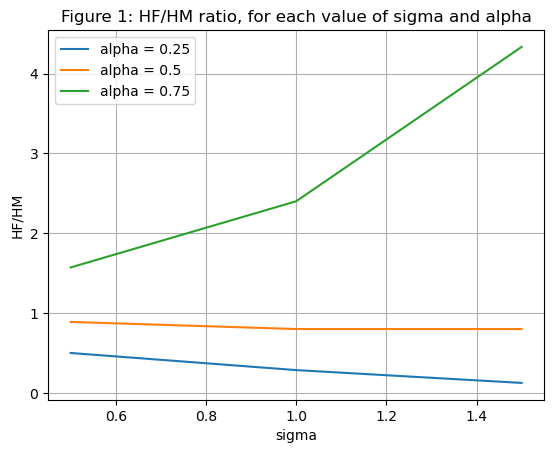

In [9]:
# Reshaping the HF/HM ratio list into a matrix
HF_HM_ratio = np.array(HF_HM_ratio).reshape((len(alpha_values), len(sigma_values)))

# Line plot for each value of alpha
for i, alpha in enumerate(alpha_values):
    plt.plot(sigma_values, HF_HM_ratio[i, :], label=f'alpha = {alpha}')

# Adding label names and graph title
plt.xlabel('sigma')
plt.ylabel('HF/HM')
plt.title('Figure 1: HF/HM ratio, for each value of sigma and alpha')

# Adding a legend
plt.legend()

# Adding gridlines
plt.grid()

# Show the plot
plt.show()


The figure shows that as $\alpha$ increases, the difference between the relative labor of men and women decreases, regardless of the value of $\sigma$. Additionally, for a fixed value of $\alpha$, increasing $\sigma$ leads to a decrease in the relative amount of labor performed by women. This is consistent with the results from **Table 1**.

Based on the results from the figure and Table 1, we can conclude that when $\alpha$ is low, women tend to specialize more in home production while men specialize more in the labor market. However, as $\alpha$ increases, this difference between the relative labor of men and women decreases. This means that for higher values of $\alpha$, men and women tend to share more equally in the home and labor markets.

Furthermore, the results indicate that increasing $\sigma$ leads to a decrease in the relative amount of labor performed by women, regardless of the value of $\alpha$. This suggests that as the degree of complementarity between home and market goods increases, women tend to specialize relatively more in home production, while men specialize more in the labor market.

---
# Question 2

We want to see what kind of relationship there is between the female and male ratio of wages and the ratio between them in homeproduction. Here male wages are held constant whilst female wages are varying. Calculating the relation between the two is easy enough, though the problem lies with visualizing it. Since both $\alpha$ and $\sigma$ can have 3 different values and therefore 9 different values for $\log{\frac{H_F}{H_M}}$, it would mean that we need to create 1 for each value of $\log{\frac{H_F}{H_M}}$, in code this can become quickly unmanageble. Instead of doing this, we can create an interactive model, where we choose the values different values for $\alpha$ and $\sigma$ that were defined en Question 1.

To do this, we can do the following steps:

1. Import interact from ipywidgets, since we want to create an interactive model.
2. Define a list for all values of $w_F$ and a define the $w_M$.
3. Define a new function, with  $\alpha$ and $\sigma$ as the input.
4. Create 2 new empty lists for $\log{\frac{wF}{wM}}$ and $\log{\frac{H_F}{H_M}}$
5. Create a for loop to calculate $\log{\frac{wF}{wM}}$ and $\log{\frac{H_F}{H_M}}$ and append them to their respective lists.
6. Plot the graph as a line graph with dots, but not display it.
7. Make it into an interactive model, where the interactive variables are $\alpha$ and $\sigma$

In [4]:
# Defining given values for wF and wM
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
wM = 1.0

# Defining a function so the function can be plotted for any value of alpha and sigma, which has been defined
def interactive_plot(alpha, sigma):

    # Replacing previous values for alpha and sigma with the ones chosen in the interactive model
    model.par.alpha = alpha
    model.par.sigma = sigma
    
    # Use solve_wF_vec() instead of looping over wF_values
    model.solve_wF_vec(discrete=True)

    # Calculate log(wF/wM) and log(HF/HM) for each value of wF
    log_wF_wM = np.log(np.array(wF_values) / wM)
    log_HF_HM = np.log(model.sol.HF_vec / model.sol.HM_vec)

    # Create a scatter plot with the given data
    plt.plot(log_wF_wM, log_HF_HM, marker='s')

    # Adding label names and graph title
    plt.xlabel('log(wF/wM)')
    plt.ylabel('log(HF/HM)')
    plt.title('Figure 2: Log HF/HM vs Log wF/wM')

    # Adding gridlines
    plt.grid()

    # Display the plot
    plt.show()

# Creating the interactive model
interact(interactive_plot, alpha=alpha_values, sigma=sigma_values)

interactive(children=(Dropdown(description='alpha', options=(0.25, 0.5, 0.75), value=0.25), Dropdown(descripti…

<function __main__.interactive_plot(alpha, sigma)>

An interactive figure was created to investigate the relationship between the $\frac{H_F}{H_M}$ ratio and the $\frac{w_F}{w_M}$ ratio, both shown as a logarithm. The results show a negative downward trend, indicating that women tend to decrease their work at home relative to men when their market wages increase relative to men's. The interactive figure allowed us to adjust the values of $\alpha$ and $\sigma$ and see the impact on the slope and level of the curve. It was found that the values of $\alpha$ and $\sigma$ play a crucial role in determining the slope and level of the curve.

When $\alpha$ is high, meaning men and women's time in home production are highly complementary, the curve has a steeper downward slope, implying that an increase in women's market wages relative to men's leads to a larger decrease in women's work at home relative to men's. On the other hand, a lower $\alpha$ value results in a flatter slope for the curve. When $\sigma$ is high, meaning home production and market work are highly substitutable, the curve has a flatter slope, indicating that an increase in women's market wages relative to men's results in a smaller decrease in women's work at home relative to men's. Conversely, a lower $\sigma$ value leads to a steeper slope for the curve.

Overall, the findings suggest that there is an inequality between home production and women's income relative to men's. However, it is important to note that the time constraint $LM+HM \leq 24$ and $LF+HF \leq 24$ was not implemented in the code, which could be problematic since there are only 24 hours in a day. Meaning, time is relative in this model.

# Question 3

Just as in question 2, we want to see the relation between the female and male ratio of wages and ratio of homeproduction. The difference here being, that we now are looking at a continuous model and not a discrete model. This would mean that we first need to code the continuous model before anything else. To start of we will be using the optimize.minimize function from SciPy library. 

While the brutforce method is a possible approach, it can be very computationally expensive for solving complex models. Therefore it can be impractical and even (as in this case) impossible to calculate. In our case the brutforce method is in too computatioanlly expensive ($84601^4 \cdot 24$ bytes) and therfore opt to using the scipy.minimize method.

To define out continuous model, we can do the follwoing steps:

1. Define a new function for the continues model
2. Create guesses for $LM, LF, HM$ and $HF$. This is because we need a starting point in the model, for the function to work. This is because we are working with an optimization model, where the pattern search (Nelder-Mead) needs a starting point.
3. Define the negative value of the utility function as an objective, to be minimized later.
4. Define the maximum and minimum bounds for the model.
5. Crete a result through the scipy.optimize method using **the Neldor Mead** method.

Now that we have our conitnuous model, we can begin to code an interactive model, which follows the exact same steps as desribed in question 2.

Below is code for the continuous model:

In [6]:
# Defining a function so the function can be plotted for any value of alpha and sigma, which has been defined
def interactive_plot_2(alpha, sigma):

    # Replacing previous values for alpha and sigma with the ones chosen in the interactive model
    model.par.alpha = alpha
    model.par.sigma = sigma
    
    # Solve the model for the vector of female wages
    model.solve_wF_vec()

    # Creating empty lists for log(wF/wM) and log(HF/HM)
    log_wF_wM = []
    log_HF_HM = []

    # Calculate log(wF/wM) and log(HF/HM) for each value of wF
    for i, wF in enumerate(wF_values):
        model.par.wF = wF
        model.par.wM = wM

        # We append log(wF/wM) and log(HF/HM) to their corresponding lists
        log_wF_wM.append(np.log(wF/wM))
        log_HF_HM.append(np.log(model.sol.HF_vec[i]/model.sol.HM_vec[i]))

    # Create a scatter plot with the given data
    plt.plot(log_wF_wM, log_HF_HM, marker='s')

    # Adding label names and graph title
    plt.xlabel('log(wF/wM)')
    plt.ylabel('log(HF/HM)')
    plt.title('Log HF/HM vs Log wF/wM')

    # Adding gridlines
    plt.grid()
    plt.show()
    plt.clf()

# Creating the interactive model
interact(interactive_plot_2, alpha=alpha_values, sigma=sigma_values)

interactive(children=(Dropdown(description='alpha', options=(0.25, 0.5, 0.75), value=0.25), Dropdown(descripti…

<function __main__.interactive_plot_2(alpha, sigma)>

As seen in the previous task, an interactive figure is shown above, where the values for $\sigma$ and $\alpha$ can be changed to the given values, of which you can see the effects. A downward trend is seen again, where the higher log $\frac{w_F}{w_M}$, the lower log $\frac{H_F}{H_M}$ become. However, a stronger correlation is seen than in the previous task, as the points are much closer to the correlation line when changing the variables of $\sigma$ and $\alpha$. Again, we can conclude that there is an inequality between home production and women's income relative to men seen in this model.

# Question 4

Here, a scatterplot is drawn with a linear regression between the log $\frac{H_F}{H_M}$ ratio and the log $w_F$. There is a clear linear downward trend between the data which is seen as the points are close to our regression line. We can observe that the higher the log $\frac{H_F}{H_M}$ ratio is, the lower the salary among women is seen to be. This means that a higher wage leads to less home production and less inequality between women and men.